Topic: Project 2  
Subject: Linear Regression  
Date: 01/27/2020  
Name: Ake Paramadilok

# Imports

In [2]:
import pandas as pd
import pickle
import PGA_Linear_Regression as pga
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline
%config InlineBackend.figure_formats = ['retina']
import numpy as np
import statsmodels.api as sm
from statsmodels.tools import add_constant
import statsmodels.formula.api as smf
import patsy
from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn import metrics
import math
import pprint
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from collections import defaultdict

Populating the interactive namespace from numpy and matplotlib


In [3]:
clean_data = pd.read_csv('full_dataset_percentage_win.csv')

# Baseline Model with OLS

In [8]:
lr_00_data = clean_data.drop(['PLAYER',
                              'py',
                              'SEASON_CURRENT',
                              'SEASON_NEXT',
                             ], axis =1).copy()

In [9]:
input_string = pga.patsy_input_str(lr_00_data,'NEXT_PERCENTAGE_OF_WINNING_PTS')
y_train, X_train = patsy.dmatrices(input_string, data=lr_00_data, return_type="dataframe")

baseline_model = sm.OLS(y_train,add_constant(X_train))
fit = baseline_model.fit()
fit.summary()

/Users/AKE/opt/anaconda3/envs/metis/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                  
==========================================================================================
Dep. Variable:     NEXT_PERCENTAGE_OF_WINNING_PTS   R-squared:                       0.340
Model:                                        OLS   Adj. R-squared:                  0.317
Method:                             Least Squares   F-statistic:                     14.53
Date:                            Mon, 27 Jan 2020   Prob (F-statistic):           9.17e-80
Time:                                    14:23:27   Log-Likelihood:                 617.14
No. Observations:                            1228   AIC:                            -1148.
Df Residuals:                                1185   BIC:                            -928.4
Df Model:                                      42                                         
Covariance Type:                        nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                 3.7156      1.937      1.918      0.055      -0.084       7.516
APPROACHES_FROM_100_125_YARDS         -6.681e-05      0.000     -0.282      0.778      -0.001       0.000
APPROACHES_FROM_100_125_YARDS_RGH      6.397e-05   8.81e-05      0.726      0.468      -0.000       0.000
APPROACHES_FROM_125_150_YARDS          5.558e-05      0.000      0.197      0.844      -0.000       0.001
APPROACHES_FROM_125_150_YARDS_RGH         0.0002      0.000      1.718      0.086   -2.87e-05       0.000
APPROACHES_FROM_150_175_YARDS            -0.0001      0.000     -0.510      0.610      -0.001       0.000
APPROACHES_FROM_150_175_YARDS_RGH      8.047e-05      0.000      0.710      0.478      -0.000       0.000
APPROACHES_FROM_175_200_YARDS            -0.0002      0.000     -0.840      0.401      -0.001       0.000
APPROACHES_FROM_175_200_YARDS_RGH         0.0001   8.05e-05      1.741      0.082   -1.78e-05       0.000
APPROACHES_FROM_200_225_YARDS          4.666e-05      0.000      0.307      0.759      -0.000       0.000
APPROACHES_FROM_200_225_YARDS_RGH     -5.988e-06   4.77e-05     -0.125      0.900   -9.96e-05    8.76e-05
APPROACHES_FROM_225_250_YARDS         -7.828e-06   9.21e-05     -0.085      0.932      -0.000       0.000
APPROACHES_FROM_225_250_YARDS_RGH     -1.915e-05   3.14e-05     -0.609      0.542   -8.08e-05    4.25e-05
APPROACHES_FROM_250_275_YARDS         -1.214e-05   5.22e-05     -0.233      0.816      -0.000    9.03e-05
APPROACHES_FROM_250_275_YARDS_RGH     -4.281e-06   2.13e-05     -0.201      0.841   -4.61e-05    3.75e-05
APPROACHES_FROM_INSIDE_100_YARDS         -0.0002      0.000     -1.110      0.267      -0.001       0.000
APPROACHES_FROM_INSIDE_100_YARDS_RGH  -8.268e-05   9.74e-05     -0.849      0.396      -0.000       0.000
BIRDIE_AVE                               -0.5081      0.189     -2.688      0.007      -0.879      -0.137
BIRDIE_OR_BETTER_CONVESION_PERCENTAGE     0.0112      0.011      1.032      0.302      -0.010       0.032
BIRDIE_OR_BETTER_PERCENTAGE               0.0655      0.037      1.749      0.081      -0.008       0.139
BIRDIE_OR_BETTER_PERCENTAGE_FAIRWAY       0.0104      0.006      1.759      0.079      -0.001       0.022
BIRDIE_OR_BETTER_PERCENTAGE_ROUGH         0.0070      0.002      3.101      0.002       0.003       0.011
BOUNCE_BACK                              -0.0007      0.002     -0.421      0.674      -0.004       0.003
CLUB_HEAD_SPEED                           0.0087      0.002      3.904      0.000       0.004       0.013
DRIVING_ACCURACY_PERCENTAGE               0.0028      0.002      1.815      0.070      -0

# Data Splitting for Training and Testing (Hold-out)

In [10]:
X = lr_00_data.drop(['NEXT_PERCENTAGE_OF_WINNING_PTS'], axis = 1)
y = lr_00_data['NEXT_PERCENTAGE_OF_WINNING_PTS']

X_train_00, X_test, y_train_00, y_test = train_test_split(X, y, test_size=.2, random_state=9)

In [11]:
print(f'X_train shape: {X_train_00.shape}\n')
print(f'X_test shape: {X_test.shape}\n')
print(f'y_train shape: {y_train_00.shape}\n')
print(f'y_test shape: {y_test.shape}\n')

X_train shape: (982, 42)

X_test shape: (246, 42)

y_train shape: (982,)

y_test shape: (246,)



New models will be generated by modifying the X_train data only.  Hold-out or X_test will only be used to score the final model.

# Model 01

Log transform of:  
- Target
- Eagles (holes per)
- Fedx Cup Points
- % of Winning Points (current and next season)

In [207]:
X_train_01 = X_train_00.copy()

In [208]:
#X_train_01.columns

## Feature Engineering

### Log Transformation of Target

In [209]:
y_train_00

143    0.173204
923    0.110143
659    0.155673
130    0.419203
34     0.205666
         ...   
56     0.599685
501    0.219597
638    0.236508
348    0.180451
382    0.086303
Name: NEXT_PERCENTAGE_OF_WINNING_PTS, Length: 982, dtype: float64

In [210]:
y_train_01 = y_train_00.apply(lambda x: log(x))
y_train_01

143   -1.753285
923   -2.205977
659   -1.859999
130   -0.869401
34    -1.581500
         ...   
56    -0.511350
501   -1.515960
638   -1.441775
348   -1.712295
382   -2.449894
Name: NEXT_PERCENTAGE_OF_WINNING_PTS, Length: 982, dtype: float64

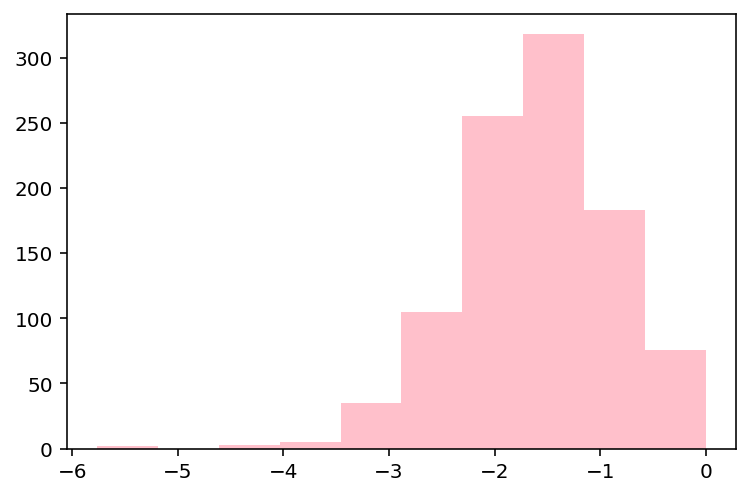

In [211]:
plt.hist(y_train_01,color = 'pink');

### Log Transformation of 'FedEx Regular Seasons Points'

In [212]:
X_train_01['FEDEX_REGULAR_SEASON_POINTS'] = X_train_01['FEDEX_REGULAR_SEASON_POINTS'].apply(lambda x: log(x))
X_train_01['FEDEX_REGULAR_SEASON_POINTS'] 

143    5.866468
923    7.074117
659    5.891644
130    6.519147
34     6.357842
         ...   
56     6.424869
501    6.315358
638    6.761573
348    6.320768
382    6.236370
Name: FEDEX_REGULAR_SEASON_POINTS, Length: 982, dtype: float64

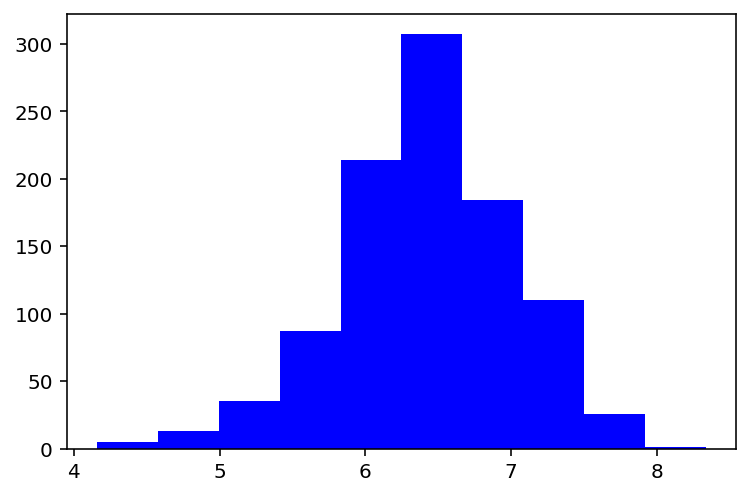

In [213]:
plt.hist(X_train_01['FEDEX_REGULAR_SEASON_POINTS'] ,color = 'blue');

### Log Transformation of 'Percentage of Winning Pts'

In [214]:
X_train_01['PERCENTAGE_OF_WINNING_PTS'] = X_train_01['PERCENTAGE_OF_WINNING_PTS'].apply(lambda x: log(x))
X_train_01['PERCENTAGE_OF_WINNING_PTS'] 

143   -1.686294
923   -0.839770
659   -1.964675
130   -1.001629
34    -1.162934
         ...   
56    -1.095907
501   -1.710485
638   -1.094747
348   -1.406326
382   -1.490725
Name: PERCENTAGE_OF_WINNING_PTS, Length: 982, dtype: float64

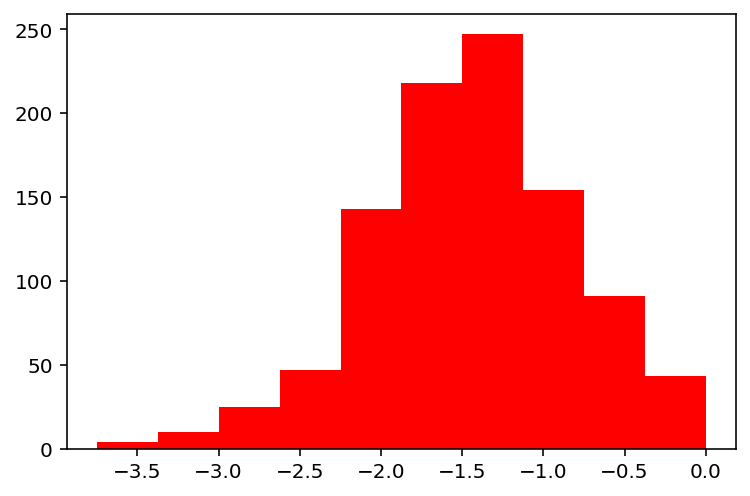

In [215]:
plt.hist(X_train_01['PERCENTAGE_OF_WINNING_PTS'] ,color = 'red');

### Log Transformation of 'Eagles Hole Per'

In [216]:
X_train_01['EAGLES_HOLES_PER'] 

143    169.2
923    176.0
659    176.4
130    315.0
34     150.5
       ...  
56     174.0
501    184.5
638    276.0
348    342.0
382    337.5
Name: EAGLES_HOLES_PER, Length: 982, dtype: float64

In [217]:
X_train_01['EAGLES_HOLES_PER'] = X_train_01['EAGLES_HOLES_PER'].apply(lambda x: log(x))
X_train_01['EAGLES_HOLES_PER'] 

143    5.131081
923    5.170484
659    5.172754
130    5.752573
34     5.013963
         ...   
56     5.159055
501    5.217649
638    5.620401
348    5.834811
382    5.821566
Name: EAGLES_HOLES_PER, Length: 982, dtype: float64

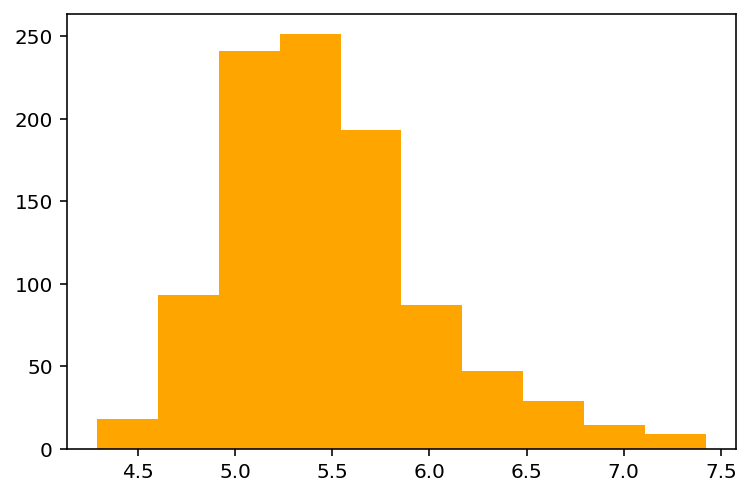

In [218]:
plt.hist(X_train_01['EAGLES_HOLES_PER'],color = 'orange');
# plt.title('Count by Percentage of Winning FedEx Cup Points Earned')
# plt.xlabel('log of % of Winner Point Total')
# plt.ylabel('Player Count')
 
# plt.savefig('y_hist_log.png', dpi=400)

## K-fold Generation

In [43]:
kf = KFold(n_splits = 5,shuffle=True,random_state=9)

for train, test in kf.split(X_train_01,y_train_01):
        X_tr, X_val = X_train_01.iloc[train],X_train_01.iloc[test]
        y_tr, y_val = y_train_01.iloc[train],y_train_01.iloc[test]

## Sklearn Linear Regression 01

In [47]:
lr_01 = LinearRegression()

# Fit model to training data
lr_01.fit(X_tr,y_tr)

# Predict on validation data
lr_01_preds = lr_01.predict(X_val)

# Score on training data
print(f' Linear regression training R2: {lr_01.score(X_tr,y_tr)}')

# Score on validation data
print(f' Linear regression validation R2: {lr_01.score(X_val,y_val)}')

# RMSE for predictions
print(f' Linear regression RMSE: {np.sqrt(metrics.mean_squared_error(y_val,lr_01_preds))}')

# MAE for predictions
print(f' Linear regression MAE: {metrics.mean_absolute_error(y_val,lr_01_preds)}')

 Linear regression training R2: 0.37193482767496244
 Linear regression validation R2: 0.40804108567303454
 Linear regression RMSE: 0.5675678408283997
 Linear regression MAE: 0.452282942636333


## Scaling Data for Ridge and Lasso

In [50]:
scaler = StandardScaler()

# Scale training and validation data
X_tr_scaled = scaler.fit_transform(X_tr)
X_val_scaled = scaler.transform(X_val)

## Lasso Regression 01

In [56]:
l1_01 = Lasso()

# Fit model to training data
l1_01.fit(X_tr_scaled, y_tr)

# Predict on validation data
l1_01_pred = l1_01.predict(X_val_scaled)

# Score on training data
print(f' Lasso regression training R2: {l1_01.score(X_tr_scaled,y_tr)}')

# Score on validation data
print(f' Lasso regression validation R2: {l1_01.score(X_val_scaled,y_val)}')

# RMSE for predictions
print(f' Lasso regression RMSE: {np.sqrt(metrics.mean_squared_error(y_val,l1_01_pred))}')

# MAE for predictions
print(f' Lasso regression MAE: {metrics.mean_absolute_error(y_val,l1_01_pred)}')

 Lasso regression training R2: 0.0
 Lasso regression validation R2: -0.003399799774336909
 Lasso regression RMSE: 0.7389397039940894
 Lasso regression MAE: 0.6043731197043205


## Ridge Regression 01

In [122]:
l2_01 = Ridge()

# Fit model to training data
l2_01.fit(X_tr_scaled, y_tr)

# Predict on validation data
l2_01_pred = l2_01.predict(X_val_scaled)

# Score on training data
print(f' Ridge regression training R2: {l2_01.score(X_tr_scaled,y_tr)}')

# Score on validation data
print(f' Ridge regression validation R2: {l2_01.score(X_val_scaled,y_val)}')

# RMSE for predictions
print(f' Ridge regression RMSE: {np.sqrt(metrics.mean_squared_error(y_val,l2_01_pred))}')

# MAE for predictions
print(f' Ridge regression MAE: {metrics.mean_absolute_error(y_val,l2_01_pred)}')

 Ridge regression training R2: 0.37170290577926185
 Ridge regression validation R2: 0.4061546009566166
 Ridge regression RMSE: 0.5684714984482344
 Ridge regression MAE: 0.4538293891191657


## Polynomial Regression 01

In [65]:
degree = list(range(0,4,1))

for degrees in degree:
    lm_01_poly = LinearRegression()
    
    poly = PolynomialFeatures(degree=degrees) 

    # Transform features for polynomial fit
    X_train_poly = poly.fit_transform(X_tr)
    X_val_poly = poly.transform(X_val)

    # Fit model to training data
    lm_01_poly.fit(X_tr,y_tr)

    # Predict on validation data
    lm_01_pred = lm_01_poly.predict(X_val)

    # Score on training data
    print(f' Polynomial regression (deg={degrees}) training R2: {lm_01_poly.score(X_tr,y_tr)}')

    # Score on validation data
    print(f' Polynomial regression (deg={degrees}) validation R2: {lm_01_poly.score(X_val,y_val)}')

    # RMSE for predictions
    print(f' Polynomial regression (deg={degrees}) RMSE: {np.sqrt(metrics.mean_squared_error(y_val,lm_01_pred))}')

    # MAE for predictions
    print(f' Polynomial regression (deg={degrees}) MAE: {metrics.mean_absolute_error(y_val,lm_01_pred)}\n')


 Polynomial regression (deg 0) training R2: 0.37193482767496244
 Polynomial regression (deg 0) validation R2: 0.40804108567303454
 Polynomial regression (deg 0) RMSE: 0.5675678408283997
 Polynomial regression (deg 0) MAE: 0.452282942636333

 Polynomial regression (deg 1) training R2: 0.37193482767496244
 Polynomial regression (deg 1) validation R2: 0.40804108567303454
 Polynomial regression (deg 1) RMSE: 0.5675678408283997
 Polynomial regression (deg 1) MAE: 0.452282942636333

 Polynomial regression (deg 2) training R2: 0.37193482767496244
 Polynomial regression (deg 2) validation R2: 0.40804108567303454
 Polynomial regression (deg 2) RMSE: 0.5675678408283997
 Polynomial regression (deg 2) MAE: 0.452282942636333

 Polynomial regression (deg 3) training R2: 0.37193482767496244
 Polynomial regression (deg 3) validation R2: 0.40804108567303454
 Polynomial regression (deg 3) RMSE: 0.5675678408283997
 Polynomial regression (deg 3) MAE: 0.452282942636333



## OLS Regression for P-values

In [140]:
# Create dataframe that includes X and y columns for OLS
X_train_01_df = pd.merge(X_train_01, y_train_01, left_index=True, right_index=True)

input_string = pga.patsy_input_str(X_train_01_df,'NEXT_PERCENTAGE_OF_WINNING_PTS')

y_train_ols1, X_train_ols1 = patsy.dmatrices(input_string, data=X_train_01_df, return_type="dataframe")

ols1_model = sm.OLS(y_train_ols1, add_constant(X_train_ols1))
fit = ols1_model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                  
==========================================================================================
Dep. Variable:     NEXT_PERCENTAGE_OF_WINNING_PTS   R-squared:                       0.386
Model:                                        OLS   Adj. R-squared:                  0.358
Method:                             Least Squares   F-statistic:                     14.03
Date:                            Sun, 26 Jan 2020   Prob (F-statistic):           4.60e-73
Time:                                    23:45:08   Log-Likelihood:                -850.52
No. Observations:                             982   AIC:                             1787.
Df Residuals:                                 939   BIC:                             1997.
Df Model:                                      42                                         
Covariance Type:                        nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                24.5896      8.525      2.885      0.004       7.860      41.319
APPROACHES_FROM_100_125_YARDS          8.903e-05      0.001      0.086      0.931      -0.002       0.002
APPROACHES_FROM_100_125_YARDS_RGH       2.05e-05      0.000      0.053      0.958      -0.001       0.001
APPROACHES_FROM_125_150_YARDS             0.0003      0.001      0.277      0.782      -0.002       0.003
APPROACHES_FROM_125_150_YARDS_RGH        -0.0002      0.001     -0.323      0.747      -0.001       0.001
APPROACHES_FROM_150_175_YARDS             0.0003      0.001      0.237      0.813      -0.002       0.003
APPROACHES_FROM_150_175_YARDS_RGH         0.0003      0.001      0.634      0.526      -0.001       0.001
APPROACHES_FROM_175_200_YARDS            -0.0015      0.001     -1.365      0.173      -0.004       0.001
APPROACHES_FROM_175_200_YARDS_RGH         0.0008      0.000      2.155      0.031    6.75e-05       0.001
APPROACHES_FROM_200_225_YARDS             0.0003      0.001      0.506      0.613      -0.001       0.002
APPROACHES_FROM_200_225_YARDS_RGH        -0.0002      0.000     -0.784      0.434      -0.001       0.000
APPROACHES_FROM_225_250_YARDS            -0.0002      0.000     -0.509      0.611      -0.001       0.001
APPROACHES_FROM_225_250_YARDS_RGH        -0.0001      0.000     -0.732      0.465      -0.000       0.000
APPROACHES_FROM_250_275_YARDS            -0.0004      0.000     -1.592      0.112      -0.001    8.65e-05
APPROACHES_FROM_250_275_YARDS_RGH     -3.308e-05   9.42e-05     -0.351      0.726      -0.000       0.000
APPROACHES_FROM_INSIDE_100_YARDS         -0.0014      0.001     -1.445      0.149      -0.003       0.000
APPROACHES_FROM_INSIDE_100_YARDS_RGH     -0.0002      0.000     -0.521      0.602      -0.001       0.001
BIRDIE_AVE                               -2.7494      1.471     -1.869      0.062      -5.636       0.137
BIRDIE_OR_BETTER_CONVESION_PERCENTAGE     0.0471      0.049      0.971      0.332      -0.048       0.142
BIRDIE_OR_BETTER_PERCENTAGE               0.3881      0.273      1.423      0.155      -0.147       0.923
BIRDIE_OR_BETTER_PERCENTAGE_FAIRWAY       0.0256      0.026      0.981      0.327      -0.026       0.077
BIRDIE_OR_BETTER_PERCENTAGE_ROUGH         0.0288      0.010      2.893      0.004       0.009       0.048
BOUNCE_BACK                               0.0046      0.008      0.599      0.549      -0.011       0.020
CLUB_HEAD_SPEED                           0.0480      0.010      4.771      0.000       0.028       0.068
DRIVING_ACCURACY_PERCENTAGE               0.0180      0.007      2.618      0.009       0

# Model 02

## Parameter Elimination

### Dropping Birdies

The features involving birdies are multicolinear so they will be transformed into 1 feature by multiplyting them all together.  

BIRDIE_AGG =   
(BIRDIE_AVE) x  
(BIRDIE_OR_BETTER_CONVESION_PERCENTAGE) x  
(BIRDIE_OR_BETTER_PERCENTAGE) x  
(BIRDIE_OR_BETTER_PERCENTAGE_FAIRWAY)  

In [324]:
X_train_02 = X_train_01.copy()
y_train_02 = y_train_01.copy()

In [325]:
X_train_02

,APPROACHES_FROM_100_125_YARDS,APPROACHES_FROM_100_125_YARDS_RGH,APPROACHES_FROM_125_150_YARDS,APPROACHES_FROM_125_150_YARDS_RGH,APPROACHES_FROM_150_175_YARDS,APPROACHES_FROM_150_175_YARDS_RGH,APPROACHES_FROM_175_200_YARDS,APPROACHES_FROM_175_200_YARDS_RGH,APPROACHES_FROM_200_225_YARDS,APPROACHES_FROM_200_225_YARDS_RGH,...,PAR_5_SCORING_AVERAGE,PUTTING_FROM_10_15ft,PUTTING_FROM_15_20ft,PUTTING_FROM_20_25ft,PUTTING_FROM_25ft_plus,PUTTING_INSIDE_10ft,PUTTS_PER_ROUND,ROUGH_PROXIMITY,SAND_SAVE_PERCENTAGE,PERCENTAGE_OF_WINNING_PTS
143,289,327,295,452,351,513,387,582,473,740,...,4.63,26.52,20.28,12.10,6.62,86.16,29.54,497,50.36,-1.686294
923,225,341,267,424,314,517,406,591,443,849,...,4.61,35.35,18.60,12.28,6.17,86.71,29.18,511,52.87,-0.839770
659,233,419,258,470,307,550,357,593,475,736,...,4.52,26.36,12.20,4.69,5.81,87.73,29.59,559,48.53,-1.964675
130,237,324,262,460,329,425,405,555,489,516,...,4.71,30.72,15.60,19.00,5.17,87.37,29.07,473,51.15,-1.001629
34,237,416,268,396,315,472,393,440,487,676,...,4.59,29.41,18.82,11.27,4.46,85.33,30.02,468,48.25,-1.162934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,224,375,291,410,339,475,400,615,497,782,...,4.69,29.35,15.69,8.33,5.40,86.23,29.82,512,47.10,-1.095907
501,238,298,248,387,303,458,362,535,505,739,...,4.57,32.49,15.75,10.00,5.41,85.53,29.28,479,47.93,-1.710485
638,262,329,309,478,369,494,443,657,478,839,...,4.74,29.72,19.75,12.26,6.94,89.03,28.92,536,48.10,-1.094747
348,255,407,304,419,394,458,437,588,505,721,...,4.67,38.05,23.50,19.20,5.66,88.49,28.71,514,60.15,-1.406326


In [326]:
X_train_02['BIRDIE_AGG'] = X_train_02['BIRDIE_AVE']*X_train_02['BIRDIE_OR_BETTER_CONVESION_PERCENTAGE']*X_train_02['BIRDIE_OR_BETTER_PERCENTAGE']*X_train_02['BIRDIE_OR_BETTER_PERCENTAGE_FAIRWAY']


In [327]:
# Check that it worked
X_train_02['BIRDIE_AGG']

143    44331.692272
923    61877.907867
659    32733.983769
130    52014.105914
34     57327.848040
           ...     
56     35549.609679
501    79715.753618
638    49824.760877
348    43211.167375
382    60554.858105
Name: BIRDIE_AGG, Length: 982, dtype: float64

In [328]:
X_train_02.head()

,APPROACHES_FROM_100_125_YARDS,APPROACHES_FROM_100_125_YARDS_RGH,APPROACHES_FROM_125_150_YARDS,APPROACHES_FROM_125_150_YARDS_RGH,APPROACHES_FROM_150_175_YARDS,APPROACHES_FROM_150_175_YARDS_RGH,APPROACHES_FROM_175_200_YARDS,APPROACHES_FROM_175_200_YARDS_RGH,APPROACHES_FROM_200_225_YARDS,APPROACHES_FROM_200_225_YARDS_RGH,...,PUTTING_FROM_10_15ft,PUTTING_FROM_15_20ft,PUTTING_FROM_20_25ft,PUTTING_FROM_25ft_plus,PUTTING_INSIDE_10ft,PUTTS_PER_ROUND,ROUGH_PROXIMITY,SAND_SAVE_PERCENTAGE,PERCENTAGE_OF_WINNING_PTS,BIRDIE_AGG
143,289,327,295,452,351,513,387,582,473,740,...,26.52,20.28,12.10,6.62,86.16,29.54,497,50.36,-1.686294,44331.692272
923,225,341,267,424,314,517,406,591,443,849,...,35.35,18.60,12.28,6.17,86.71,29.18,511,52.87,-0.839770,61877.907867
659,233,419,258,470,307,550,357,593,475,736,...,26.36,12.20,4.69,5.81,87.73,29.59,559,48.53,-1.964675,32733.983769
130,237,324,262,460,329,425,405,555,489,516,...,30.72,15.60,19.00,5.17,87.37,29.07,473,51.15,-1.001629,52014.105914
34,237,416,268,396,315,472,393,440,487,676,...,29.41,18.82,11.27,4.46,85.33,30.02,468,48.25,-1.162934,57327.848040


### Dropping FedEx Regular Season Points, Clubhead Speed and Birdies

FedEx Regular Season Points was also multicolinear with % of Winning Points, so it will be dropped. 

In [329]:
X_train_02 = X_train_02.drop(['FEDEX_REGULAR_SEASON_POINTS',
                              'BIRDIE_AVE',
                              'BIRDIE_OR_BETTER_CONVESION_PERCENTAGE',
                              'BIRDIE_OR_BETTER_PERCENTAGE',
                              'BIRDIE_OR_BETTER_PERCENTAGE_FAIRWAY',
                              'CLUB_HEAD_SPEED'
                             ], axis =1)

In [330]:
X_train_02.columns

Index(['APPROACHES_FROM_100_125_YARDS', 'APPROACHES_FROM_100_125_YARDS_RGH',
       'APPROACHES_FROM_125_150_YARDS', 'APPROACHES_FROM_125_150_YARDS_RGH',
       'APPROACHES_FROM_150_175_YARDS', 'APPROACHES_FROM_150_175_YARDS_RGH',
       'APPROACHES_FROM_175_200_YARDS', 'APPROACHES_FROM_175_200_YARDS_RGH',
       'APPROACHES_FROM_200_225_YARDS', 'APPROACHES_FROM_200_225_YARDS_RGH',
       'APPROACHES_FROM_225_250_YARDS', 'APPROACHES_FROM_225_250_YARDS_RGH',
       'APPROACHES_FROM_250_275_YARDS', 'APPROACHES_FROM_250_275_YARDS_RGH',
       'APPROACHES_FROM_INSIDE_100_YARDS',
       'APPROACHES_FROM_INSIDE_100_YARDS_RGH',
       'BIRDIE_OR_BETTER_PERCENTAGE_ROUGH', 'BOUNCE_BACK',
       'DRIVING_ACCURACY_PERCENTAGE', 'DRIVING_DISTANCE', 'EAGLES_HOLES_PER',
       'FAIRWAY_PROXIMITY', 'FINAL_ROUND_PERFORMANCE',
       'GREENS_IN_REGULATION_PERCENTAGE', 'PAR_3_SCORING_AVERAGE',
       'PAR_4_SCORING_AVERAGE', 'PAR_5_SCORING_AVERAGE',
       'PUTTING_FROM_10_15ft', 'PUTTING_FROM_15_20ft', 

## K-fold Generation 02

In [331]:
kf = KFold(n_splits = 5,shuffle=True,random_state=9)

for train, test in kf.split(X_train_02,y_train_02):
        X_tr2, X_val2 = X_train_02.iloc[train],X_train_02.iloc[test]
        y_tr2, y_val2 = y_train_02.iloc[train],y_train_02.iloc[test]

## Sklearn Linear Regression 02

In [332]:
lr_02 = LinearRegression()

# Fit model to training data
lr_02.fit(X_tr2,y_tr2)

# Predict on validation data
lr_02_preds = lr_02.predict(X_val2)

# Score on training data
print(f' Linear regression training R2: {lr_02.score(X_tr2,y_tr2)}')

# Score on validation data
print(f' Linear regression validation R2: {lr_02.score(X_val2,y_val2)}')

# RMSE for predictions
print(f' Linear regression RMSE: {np.sqrt(metrics.mean_squared_error(y_val2,lr_02_preds))}')

# MAE for predictions
print(f' Linear regression MAE: {metrics.mean_absolute_error(y_val2,lr_02_preds)}')

 Linear regression training R2: 0.3489729098500858
 Linear regression validation R2: 0.3973042415217253
 Linear regression RMSE: 0.5726919319082859
 Linear regression MAE: 0.45882302206934755


## Scaling Data For Ridge and Lasso

In [333]:
scaler = StandardScaler()

# Scale training and validation data
X_tr2_scaled = scaler.fit_transform(X_tr2)
X_val2_scaled = scaler.transform(X_val2)

## Lasso Regression 02

In [334]:
l1_02 = Lasso()

# Fit model to training data
l1_02.fit(X_tr2_scaled, y_tr2)

# Predict on validation data
l1_02_pred = l1_02.predict(X_val2_scaled)

# Score on training data
print(f' Lasso regression training R2: {l1_02.score(X_tr2_scaled,y_tr2)}')

# Score on validation data
print(f' Lasso regression validation R2: {l1_02.score(X_val2_scaled,y_val2)}')

# RMSE for predictions
print(f' Lasso regression RMSE: {np.sqrt(metrics.mean_squared_error(y_val2,l2_01_pred))}')

# MAE for predictions
print(f' Lasso regression MAE: {metrics.mean_absolute_error(y_val2,l1_02_pred)}')

 Lasso regression training R2: 0.0
 Lasso regression validation R2: -0.003399799774336909


NameError: name 'l2_01_pred' is not defined

## Ridge Regression 02

In [335]:
l2_02 = Ridge()

# Fit model to training data
l2_02.fit(X_tr2_scaled, y_tr2)

# Predict on validation data
l2_02_pred = l2_02.predict(X_val2_scaled)

# Score on training data
print(f' Ridge regression training R2: {l2_02.score(X_tr2_scaled,y_tr2)}')

# Score on validation data
print(f' Ridge regression validation R2: {l2_02.score(X_val2_scaled,y_val2)}')

# RMSE for predictions
print(f' Ridge regression RMSE: {np.sqrt(metrics.mean_squared_error(y_val2,l2_02_pred))}')

# MAE for predictions
print(f' Ridge regression MAE: {metrics.mean_absolute_error(y_val2,l2_02_pred)}')

 Ridge regression training R2: 0.3489579437459019
 Ridge regression validation R2: 0.3980699344510356
 Ridge regression RMSE: 0.5723280289605722
 Ridge regression MAE: 0.4587152332274918


## Polynomial Regression 02

In [336]:
degree = list(range(0,4,1))

for degrees in degree:
    lm_02_poly = LinearRegression()
    
    poly = PolynomialFeatures(degree=degrees) 

    # Transform features for polynomial fit
    X_train2_poly = poly.fit_transform(X_tr2)
    X_val2_poly = poly.transform(X_val2)

    # Fit model to training data
    lm_02_poly.fit(X_tr2,y_tr2)

    # Predict on validation data
    lm_02_pred = lm_02_poly.predict(X_val2)

    # Score on training data
    print(f' Polynomial regression (deg={degrees}) training R2: {lm_02_poly.score(X_tr2,y_tr2)}')

    # Score on validation data
    print(f' Polynomial regression (deg={degrees}) validation R2: {lm_02_poly.score(X_val2,y_val2)}')

    # RMSE for predictions
    print(f' Polynomial regression (deg={degrees}) RMSE: {np.sqrt(metrics.mean_squared_error(y_val2,lm_02_pred))}')

    # MAE for predictions
    print(f' Polynomial regression (deg={degrees}) MAE: {metrics.mean_absolute_error(y_val2,lm_02_pred)}\n')


 Polynomial regression (deg=0) training R2: 0.3489729098500858
 Polynomial regression (deg=0) validation R2: 0.3973042415217253
 Polynomial regression (deg=0) RMSE: 0.5726919319082859
 Polynomial regression (deg=0) MAE: 0.45882302206934755

 Polynomial regression (deg=1) training R2: 0.3489729098500858
 Polynomial regression (deg=1) validation R2: 0.3973042415217253
 Polynomial regression (deg=1) RMSE: 0.5726919319082859
 Polynomial regression (deg=1) MAE: 0.45882302206934755

 Polynomial regression (deg=2) training R2: 0.3489729098500858
 Polynomial regression (deg=2) validation R2: 0.3973042415217253
 Polynomial regression (deg=2) RMSE: 0.5726919319082859
 Polynomial regression (deg=2) MAE: 0.45882302206934755

 Polynomial regression (deg=3) training R2: 0.3489729098500858
 Polynomial regression (deg=3) validation R2: 0.3973042415217253
 Polynomial regression (deg=3) RMSE: 0.5726919319082859
 Polynomial regression (deg=3) MAE: 0.45882302206934755



## OLS Regression for P-values 02

In [337]:
# Create dataframe that includes X and y columns for OLS
X_train_02_df = pd.merge(X_train_02, y_train_02, left_index=True, right_index=True)

input_string = pga.patsy_input_str(X_train_02_df,'NEXT_PERCENTAGE_OF_WINNING_PTS')

y_train_ols2, X_train_ols2 = patsy.dmatrices(input_string, data=X_train_02_df, return_type="dataframe")

ols2_model = sm.OLS(y_train_ols2, add_constant(X_train_ols2))
fit = ols2_model.fit()
fit.summary()

/Users/AKE/opt/anaconda3/envs/metis/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                  
==========================================================================================
Dep. Variable:     NEXT_PERCENTAGE_OF_WINNING_PTS   R-squared:                       0.365
Model:                                        OLS   Adj. R-squared:                  0.340
Method:                             Least Squares   F-statistic:                     14.64
Date:                            Mon, 27 Jan 2020   Prob (F-statistic):           1.48e-69
Time:                                    16:29:56   Log-Likelihood:                -867.05
No. Observations:                             982   AIC:                             1810.
Df Residuals:                                 944   BIC:                             1996.
Df Model:                                      37                                         
Covariance Type:                        nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                               25.9410      8.296      3.127      0.002       9.659      42.223
APPROACHES_FROM_100_125_YARDS           -0.0002      0.001     -0.152      0.879      -0.002       0.002
APPROACHES_FROM_100_125_YARDS_RGH    -6.343e-05      0.000     -0.161      0.872      -0.001       0.001
APPROACHES_FROM_125_150_YARDS            0.0005      0.001      0.361      0.718      -0.002       0.003
APPROACHES_FROM_125_150_YARDS_RGH       -0.0006      0.001     -1.101      0.271      -0.002       0.000
APPROACHES_FROM_150_175_YARDS        -1.616e-05      0.001     -0.013      0.990      -0.003       0.002
APPROACHES_FROM_150_175_YARDS_RGH    -8.162e-05      0.001     -0.161      0.872      -0.001       0.001
APPROACHES_FROM_175_200_YARDS           -0.0020      0.001     -1.816      0.070      -0.004       0.000
APPROACHES_FROM_175_200_YARDS_RGH        0.0006      0.000      1.588      0.113      -0.000       0.001
APPROACHES_FROM_200_225_YARDS         6.752e-05      0.001      0.101      0.920      -0.001       0.001
APPROACHES_FROM_200_225_YARDS_RGH       -0.0003      0.000     -1.634      0.102      -0.001    6.79e-05
APPROACHES_FROM_225_250_YARDS           -0.0001      0.000     -0.250      0.803      -0.001       0.001
APPROACHES_FROM_225_250_YARDS_RGH       -0.0001      0.000     -0.780      0.436      -0.000       0.000
APPROACHES_FROM_250_275_YARDS           -0.0004      0.000     -1.695      0.090      -0.001     6.3e-05
APPROACHES_FROM_250_275_YARDS_RGH    -5.252e-05   9.52e-05     -0.551      0.581      -0.000       0.000
APPROACHES_FROM_INSIDE_100_YARDS        -0.0013      0.001     -1.403      0.161      -0.003       0.001
APPROACHES_FROM_INSIDE_100_YARDS_RGH    -0.0003      0.000     -0.695      0.487      -0.001       0.001
BIRDIE_OR_BETTER_PERCENTAGE_ROUGH        0.0243      0.009      2.825      0.005       0.007       0.041
BOUNCE_BACK                              0.0034      0.008      0.440      0.660      -0.012       0.019
DRIVING_ACCURACY_PERCENTAGE              0.0092      0.007      1.365      0.173      -0.004       0.022
DRIVING_DISTANCE                         0.0033      0.005      0.676      0.500      -0.006       0.013
EAGLES_HOLES_PER                        -0.0396      0.044     -0.891      0.373      -0.127       0.048
FAIRWAY_PROXIMITY                       -0.0009      0.003     -0.371      0.711      -0.006       0.004
FINAL_ROUND_PERFORMANCE                  0.0017      0.001      1.150      0.251      -0.001       0.005
GREENS_IN_REGULATION_PERCENTAGE         -0.0596      0.031     -1.950      0.051      -0.119       0.000
PAR_3_SCORI

## Heat Map 02

In [157]:
corr = X_train_02.corr()

plt.figure(figsize = (80,80))
ax = sns.heatmap(corr,
                     vmin = -1, 
                     vmax = 1, 
                     center = 0,
                     cmap = sns.diverging_palette(20,220,n=200),
                     square = True,
                     annot = True)
ax.set_xticklabels(ax.get_xticklabels(),
                       rotation = 45,
                       horizontalalignment = 'right');

Strong multicolinearities have been eliminated. 

# Model 03

In [203]:
X_train_03 = X_train_02.copy()
y_train_03 = y_train_02.copy()

## Parameter Elimination
Per p-values > 0.100 from OLS model

In [204]:
X_train_03 = X_train_03.loc[:,['APPROACHES_FROM_175_200_YARDS',
                              'APPROACHES_FROM_250_275_YARDS',
                              'BIRDIE_OR_BETTER_PERCENTAGE_ROUGH',
                              'GREENS_IN_REGULATION_PERCENTAGE',
                              'PAR_3_SCORING_AVERAGE',
                              'PAR_4_SCORING_AVERAGE',
                              'PAR_5_SCORING_AVERAGE',
                              'PUTTING_FROM_25ft_plus',
                              'PUTTS_PER_ROUND',
                              'PERCENTAGE_OF_WINNING_PTS'
                             ]]

In [205]:
X_train_03.head()

metric,APPROACHES_FROM_175_200_YARDS,APPROACHES_FROM_250_275_YARDS,BIRDIE_OR_BETTER_PERCENTAGE_ROUGH,GREENS_IN_REGULATION_PERCENTAGE,PAR_3_SCORING_AVERAGE,PAR_4_SCORING_AVERAGE,PAR_5_SCORING_AVERAGE,PUTTING_FROM_25ft_plus,PUTTS_PER_ROUND,PERCENTAGE_OF_WINNING_PTS
143,387,717,13.33,68.77,3.05,4.03,4.63,6.62,29.54,-1.686294
923,406,824,17.21,66.29,3.06,4.06,4.61,6.17,29.18,-0.839770
659,357,704,13.38,66.89,3.09,4.06,4.52,5.81,29.59,-1.964675
130,405,905,18.52,65.95,3.13,4.03,4.71,5.17,29.07,-1.001629
34,393,690,15.99,71.26,3.11,4.01,4.59,4.46,30.02,-1.162934


## K-fold Generation 03

In [206]:
kf = KFold(n_splits = 5,shuffle=True,random_state=9)

for train, test in kf.split(X_train_03,y_train_03):
        X_tr3, X_val3 = X_train_03.iloc[train],X_train_03.iloc[test]
        y_tr3, y_val3 = y_train_03.iloc[train],y_train_03.iloc[test]

## Sklearn Linear Regression 03

In [207]:
lr_03 = LinearRegression()

# Fit model to training data
lr_03.fit(X_tr3,y_tr3)

# Predict on validation data
lr_03_preds = lr_03.predict(X_val3)

# Score on training data
print(f' Linear regression training R2: {lr_03.score(X_tr3,y_tr3)}')

# Score on validation data
print(f' Linear regression validation R2: {lr_03.score(X_val3,y_val3)}')

# RMSE for predictions
print(f' Linear regression RMSE: {np.sqrt(metrics.mean_squared_error(y_val3,lr_03_preds))}')

# MAE for predictions
print(f' Linear regression MAE: {metrics.mean_absolute_error(y_val3,lr_03_preds)}')

 Linear regression training R2: 0.3285356865271526
 Linear regression validation R2: 0.42960583237444594
 Linear regression RMSE: 0.5571338364889304
 Linear regression MAE: 0.4482330514487751


## Scaling Data For Ridge and Lasso

In [208]:
scaler = StandardScaler()

# Scale training and validation data
X_tr3_scaled = scaler.fit_transform(X_tr3)
X_val3_scaled = scaler.transform(X_val3)

## Lasso Regression 03

In [209]:
l1_03 = Lasso()

# Fit model to training data
l1_03.fit(X_tr3_scaled, y_tr3)

# Predict on validation data
l1_03_pred = l1_03.predict(X_val3_scaled)

# Score on training data
print(f' Lasso regression training R2: {l1_03.score(X_tr3_scaled,y_tr3)}')

# Score on validation data
print(f' Lasso regression validation R2: {l1_03.score(X_val3_scaled,y_val3)}')

# RMSE for predictions
print(f' Lasso regression RMSE: {np.sqrt(metrics.mean_squared_error(y_val3,l1_03_pred))}')

# MAE for predictions
print(f' Lasso regression MAE: {metrics.mean_absolute_error(y_val3,l1_03_pred)}')

 Lasso regression training R2: 0.0
 Lasso regression validation R2: -0.003399799774336909
 Lasso regression RMSE: 0.7389397039940894
 Lasso regression MAE: 0.6043731197043205


## Ridge Regression 03

In [210]:
l2_03 = Ridge()

# Fit model to training data
l2_03.fit(X_tr3_scaled, y_tr3)

# Predict on validation data
l2_03_pred = l2_03.predict(X_val3_scaled)

# Score on training data
print(f' Ridge regression training R2: {l2_03.score(X_tr3_scaled,y_tr3)}')

# Score on validation data
print(f' Ridge regression validation R2: {l2_03.score(X_val3_scaled,y_val3)}')

# RMSE for predictions
print(f' Ridge regression RMSE: {np.sqrt(metrics.mean_squared_error(y_val3,l2_03_pred))}')

# MAE for predictions
print(f' Ridge regression MAE: {metrics.mean_absolute_error(y_val3,l2_03_pred)}')

 Ridge regression training R2: 0.32853050429945574
 Ridge regression validation R2: 0.42956543687435367
 Ridge regression RMSE: 0.5571535643392219
 Ridge regression MAE: 0.4484338874073196


## Polynomial Regression 03

In [211]:
degree = list(range(0,4,1))

for degrees in degree:
    lm_03_poly = LinearRegression()
    
    poly = PolynomialFeatures(degree=degrees) 

    # Transform features for polynomial fit
    X_train3_poly = poly.fit_transform(X_tr3)
    X_val3_poly = poly.transform(X_val3)

    # Fit model to training data
    lm_03_poly.fit(X_tr3,y_tr3)

    # Predict on validation data
    lm_03_pred = lm_03_poly.predict(X_val3)

    # Score on training data
    print(f' Polynomial regression (deg={degrees}) training R2: {lm_03_poly.score(X_tr3,y_tr3)}')

    # Score on validation data
    print(f' Polynomial regression (deg={degrees}) validation R2: {lm_03_poly.score(X_val3,y_val3)}')

    # RMSE for predictions
    print(f' Polynomial regression (deg={degrees}) RMSE: {np.sqrt(metrics.mean_squared_error(y_val3,lm_03_pred))}')

    # MAE for predictions
    print(f' Polynomial regression (deg={degrees}) MAE: {metrics.mean_absolute_error(y_val3,lm_03_pred)}\n')


 Polynomial regression (deg=0) training R2: 0.3285356865271526
 Polynomial regression (deg=0) validation R2: 0.42960583237444594
 Polynomial regression (deg=0) RMSE: 0.5571338364889304
 Polynomial regression (deg=0) MAE: 0.4482330514487751

 Polynomial regression (deg=1) training R2: 0.3285356865271526
 Polynomial regression (deg=1) validation R2: 0.42960583237444594
 Polynomial regression (deg=1) RMSE: 0.5571338364889304
 Polynomial regression (deg=1) MAE: 0.4482330514487751

 Polynomial regression (deg=2) training R2: 0.3285356865271526
 Polynomial regression (deg=2) validation R2: 0.42960583237444594
 Polynomial regression (deg=2) RMSE: 0.5571338364889304
 Polynomial regression (deg=2) MAE: 0.4482330514487751

 Polynomial regression (deg=3) training R2: 0.3285356865271526
 Polynomial regression (deg=3) validation R2: 0.42960583237444594
 Polynomial regression (deg=3) RMSE: 0.5571338364889304
 Polynomial regression (deg=3) MAE: 0.4482330514487751



## OLS Regression for P-values 03

In [212]:
# Create dataframe that includes X and y columns for OLS
X_train_03_df = pd.merge(X_train_03, y_train_03, left_index=True, right_index=True)

input_string = pga.patsy_input_str(X_train_03_df,'NEXT_PERCENTAGE_OF_WINNING_PTS')

y_train_ols3, X_train_ols3 = patsy.dmatrices(input_string, data=X_train_03_df, return_type="dataframe")

ols3_model = sm.OLS(y_train_ols3, add_constant(X_train_ols3))
fit = ols3_model.fit()
fit.summary()

/Users/AKE/opt/anaconda3/envs/metis/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                  
==========================================================================================
Dep. Variable:     NEXT_PERCENTAGE_OF_WINNING_PTS   R-squared:                       0.351
Model:                                        OLS   Adj. R-squared:                  0.344
Method:                             Least Squares   F-statistic:                     52.42
Date:                            Mon, 27 Jan 2020   Prob (F-statistic):           3.45e-84
Time:                                    00:29:20   Log-Likelihood:                -877.74
No. Observations:                             982   AIC:                             1777.
Df Residuals:                                 971   BIC:                             1831.
Df Model:                                      10                                         
Covariance Type:                        nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            32.7348      6.637      4.932      0.000      19.710      45.759
APPROACHES_FROM_175_200_YARDS        -0.0021      0.001     -2.443      0.015      -0.004      -0.000
APPROACHES_FROM_250_275_YARDS        -0.0004      0.000     -1.892      0.059      -0.001    1.51e-05
BIRDIE_OR_BETTER_PERCENTAGE_ROUGH     0.0252      0.007      3.461      0.001       0.011       0.040
GREENS_IN_REGULATION_PERCENTAGE      -0.0389      0.028     -1.394      0.164      -0.094       0.016
PAR_3_SCORING_AVERAGE                -1.6795      0.678     -2.478      0.013      -3.010      -0.349
PAR_4_SCORING_AVERAGE                -6.0545      1.357     -4.460      0.000      -8.718      -3.391
PAR_5_SCORING_AVERAGE                -1.4442      0.428     -3.378      0.001      -2.283      -0.605
PUTTING_FROM_25ft_plus               -0.0319      0.014     -2.344      0.019      -0.059      -0.005
PUTTS_PER_ROUND                       0.2079      0.119      1.752      0.080      -0.025       0.441
PERCENTAGE_OF_WINNING_PTS             0.3648      0.039      9.315      0.000       0.288       0.442
==============================================================================
Omnibus:                       50.414   Durbin-Watson:                   1.917
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               67.347
Skew:                          -0.470   Prob(JB):                     2.38e-15
Kurtosis:                       3.874   Cond. No.                     3.20e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Model 04

In [338]:
X_train_04 = X_train_02.copy()
y_train_04 = y_train_02.copy()

## Parameter Elimination

In [339]:
X_train_04 = X_train_04.loc[:,['APPROACHES_FROM_175_200_YARDS',
                              'APPROACHES_FROM_250_275_YARDS',
                              'BIRDIE_OR_BETTER_PERCENTAGE_ROUGH',
                              'GREENS_IN_REGULATION_PERCENTAGE',
                              'PAR_3_SCORING_AVERAGE',
                              'PAR_4_SCORING_AVERAGE',
                              'PAR_5_SCORING_AVERAGE',
                              'PUTTING_FROM_25ft_plus',
                              'PUTTS_PER_ROUND',
                              'PERCENTAGE_OF_WINNING_PTS'
                             ]]

## Feature Engineering

### Adding Polynomial Terms

In [340]:
X_train_04['PAR_5_SCORING_AVERAGE'] = X_train_04['PAR_5_SCORING_AVERAGE']**3

In [341]:
X_train_04['PAR_4_SCORING_AVERAGE'] = X_train_04['PAR_4_SCORING_AVERAGE']**4

## K-fold Generation 04

In [342]:
kf = KFold(n_splits = 4,shuffle=True,random_state=9)

for train, test in kf.split(X_train_04,y_train_04):
        X_tr4, X_val4 = X_train_04.iloc[train],X_train_04.iloc[test]
        y_tr4, y_val4 = y_train_04.iloc[train],y_train_04.iloc[test]

## Sklearn Linear Regression 04

In [343]:
lr_04 = LinearRegression()

# Fit model to training data
lr_04.fit(X_tr4,y_tr4)

# Predict on validation data
lr_04_preds = lr_04.predict(X_val4)

# Score on training data
print(f' Linear regression training R2: {lr_04.score(X_tr4,y_tr4)}')

# Score on validation data
print(f' Linear regression validation R2: {lr_04.score(X_val4,y_val4)}')

# RMSE for predictions
print(f' Linear regression RMSE: {np.sqrt(metrics.mean_squared_error(y_val4,lr_04_preds))}')

# MAE for predictions
print(f' Linear regression MAE: {metrics.mean_absolute_error(y_val4,lr_04_preds)}')

 Linear regression training R2: 0.3291830491962291
 Linear regression validation R2: 0.41005633313027456
 Linear regression RMSE: 0.555408684467772
 Linear regression MAE: 0.44209333435273657


## Scaling Data for Ridge and Lasso

In [344]:
scaler = StandardScaler()

# Scale training and validation data
X_tr4_scaled = scaler.fit_transform(X_tr4)
X_val4_scaled = scaler.transform(X_val4)

## Lasso Regression 04

In [345]:
l1_04 = Lasso()

# Fit model to training data
l1_04.fit(X_tr4_scaled, y_tr4)

# Predict on validation data
l1_04_pred = l1_04.predict(X_val4_scaled)

# Score on training data
print(f' Lasso regression training R2: {l1_04.score(X_tr4_scaled,y_tr4)}')

# Score on validation data
print(f' Lasso regression validation R2: {l1_04.score(X_val4_scaled,y_val4)}')

# RMSE for predictions
print(f' Lasso regression RMSE: {np.sqrt(metrics.mean_squared_error(y_val4,l1_04_pred))}')

# MAE for predictions
print(f' Lasso regression MAE: {metrics.mean_absolute_error(y_val4,l1_04_pred)}')

 Lasso regression training R2: 0.0
 Lasso regression validation R2: -0.005112990501535686
 Lasso regression RMSE: 0.7249613232625364
 Lasso regression MAE: 0.5868668789321141


## Ridge Regression 04

In [346]:
l2_04 = Ridge(alpha = .01)

# Fit model to training data
l2_04.fit(X_tr4_scaled, y_tr4)

# Predict on validation data
l2_04_pred = l2_04.predict(X_val4_scaled)

# Score on training data
print(f' Ridge regression training R2: {l2_04.score(X_tr4_scaled,y_tr4)}')

# Score on validation data
print(f' Ridge regression validation R2: {l2_04.score(X_val4_scaled,y_val4)}')

# RMSE for predictions
print(f' Ridge regression RMSE: {np.sqrt(metrics.mean_squared_error(y_val4,l2_04_pred))}')

# MAE for predictions
print(f' Ridge regression MAE: {metrics.mean_absolute_error(y_val4,l2_04_pred)}')

 Ridge regression training R2: 0.32918304813258037
 Ridge regression validation R2: 0.41006032610024934
 Ridge regression RMSE: 0.5554068048527527
 Ridge regression MAE: 0.44209312253730726


## Polynomial Regression 04

In [355]:
degree = list(range(0,4,1))

for degrees in degree:
    lm_04_poly = LinearRegression()
    
    poly = PolynomialFeatures(degree=degrees) 

    # Transform features for polynomial fit
    X_train4_poly = poly.fit_transform(X_tr4)
    X_val4_poly = poly.transform(X_val4)

    # Fit model to training data
    lm_04_poly.fit(X_tr4,y_tr4)

    # Predict on validation data
    lm_04_pred = lm_04_poly.predict(X_val4)

    # Score on training data
    print(f' Polynomial regression (deg={degrees}) training R2: {lm_04_poly.score(X_tr4,y_tr4)}')

    # Score on validation data
    print(f' Polynomial regression (deg={degrees}) validation R2: {lm_04_poly.score(X_val4,y_val4)}')

    # RMSE for predictions
    print(f' Polynomial regression (deg={degrees}) RMSE: {np.sqrt(metrics.mean_squared_error(y_val4,lm_04_pred))}')

    # MAE for predictions
    print(f' Polynomial regression (deg={degrees}) MAE: {metrics.mean_absolute_error(y_val4,lm_04_pred)}\n')


 Polynomial regression (deg=0) training R2: 0.3171825164977443
 Polynomial regression (deg=0) validation R2: 0.4182596534108016
 Polynomial regression (deg=0) RMSE: 0.5515336151686515
 Polynomial regression (deg=0) MAE: 0.4441040862778935

 Polynomial regression (deg=1) training R2: 0.3171825164977443
 Polynomial regression (deg=1) validation R2: 0.4182596534108016
 Polynomial regression (deg=1) RMSE: 0.5515336151686515
 Polynomial regression (deg=1) MAE: 0.4441040862778935

 Polynomial regression (deg=2) training R2: 0.3171825164977443
 Polynomial regression (deg=2) validation R2: 0.4182596534108016
 Polynomial regression (deg=2) RMSE: 0.5515336151686515
 Polynomial regression (deg=2) MAE: 0.4441040862778935

 Polynomial regression (deg=3) training R2: 0.3171825164977443
 Polynomial regression (deg=3) validation R2: 0.4182596534108016
 Polynomial regression (deg=3) RMSE: 0.5515336151686515
 Polynomial regression (deg=3) MAE: 0.4441040862778935



## OLS Regression for P-values 04

In [351]:
# Create dataframe that includes X and y columns for OLS
X_train_04_df = pd.merge(X_train_04, y_train_04, left_index=True, right_index=True)

input_string = pga.patsy_input_str(X_train_04_df,'NEXT_PERCENTAGE_OF_WINNING_PTS')

y_train_ols4, X_train_ols4 = patsy.dmatrices(input_string, data=X_train_04_df, return_type="dataframe")

ols4_model = sm.OLS(y_train_ols4, add_constant(X_train_ols4))
fit = ols4_model.fit()
fit.summary()

/Users/AKE/opt/anaconda3/envs/metis/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                  
==========================================================================================
Dep. Variable:     NEXT_PERCENTAGE_OF_WINNING_PTS   R-squared:                       0.344
Model:                                        OLS   Adj. R-squared:                  0.340
Method:                             Least Squares   F-statistic:                     85.08
Date:                            Mon, 27 Jan 2020   Prob (F-statistic):           1.02e-85
Time:                                    00:45:23   Log-Likelihood:                -882.97
No. Observations:                             982   AIC:                             1780.
Df Residuals:                                 975   BIC:                             1814.
Df Model:                                       6                                         
Covariance Type:                        nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                             6.2484      0.827      7.558      0.000       4.626       7.871
APPROACHES_FROM_175_200_YARDS        -0.0027      0.001     -3.366      0.001      -0.004      -0.001
BIRDIE_OR_BETTER_PERCENTAGE_ROUGH     0.0225      0.007      3.148      0.002       0.008       0.037
PAR_4_SCORING_AVERAGE                -0.0167      0.003     -6.550      0.000      -0.022      -0.012
PAR_5_SCORING_AVERAGE                -0.0191      0.005     -3.504      0.000      -0.030      -0.008
PUTTING_FROM_25ft_plus               -0.0336      0.013     -2.527      0.012      -0.060      -0.008
PERCENTAGE_OF_WINNING_PTS             0.3738      0.038      9.741      0.000       0.298       0.449
==============================================================================
Omnibus:                       59.622   Durbin-Watson:                   1.924
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               86.283
Skew:                          -0.502   Prob(JB):                     1.84e-19
Kurtosis:                       4.049   Cond. No.                     2.13e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Model 05

In [259]:
X_train_05 = X_train_01.copy()
y_train_05 = y_train_01.copy()

In [260]:
X_train_05.columns

Index(['APPROACHES_FROM_100_125_YARDS', 'APPROACHES_FROM_100_125_YARDS_RGH',
       'APPROACHES_FROM_125_150_YARDS', 'APPROACHES_FROM_125_150_YARDS_RGH',
       'APPROACHES_FROM_150_175_YARDS', 'APPROACHES_FROM_150_175_YARDS_RGH',
       'APPROACHES_FROM_175_200_YARDS', 'APPROACHES_FROM_175_200_YARDS_RGH',
       'APPROACHES_FROM_200_225_YARDS', 'APPROACHES_FROM_200_225_YARDS_RGH',
       'APPROACHES_FROM_225_250_YARDS', 'APPROACHES_FROM_225_250_YARDS_RGH',
       'APPROACHES_FROM_250_275_YARDS', 'APPROACHES_FROM_250_275_YARDS_RGH',
       'APPROACHES_FROM_INSIDE_100_YARDS',
       'APPROACHES_FROM_INSIDE_100_YARDS_RGH', 'BIRDIE_AVE',
       'BIRDIE_OR_BETTER_CONVESION_PERCENTAGE', 'BIRDIE_OR_BETTER_PERCENTAGE',
       'BIRDIE_OR_BETTER_PERCENTAGE_FAIRWAY',
       'BIRDIE_OR_BETTER_PERCENTAGE_ROUGH', 'BOUNCE_BACK', 'CLUB_HEAD_SPEED',
       'DRIVING_ACCURACY_PERCENTAGE', 'DRIVING_DISTANCE', 'EAGLES_HOLES_PER',
       'FAIRWAY_PROXIMITY', 'FEDEX_REGULAR_SEASON_POINTS',
       'FINAL_ROU

## Parameter Elimination
Parameters eliminated one at a time according to OLS p-value.  Threshold was p = 0.05 and parameters with maximum p-values were eliminated firs then the OLS was re-run.  Process was repeated until all parameters had p-values below threshold. 

In [261]:
X_train_05 = X_train_05.loc[:,[
#     'APPROACHES_FROM_100_125_YARDS', 
#     'APPROACHES_FROM_100_125_YARDS_RGH',
#     'APPROACHES_FROM_125_150_YARDS', 
#     'APPROACHES_FROM_125_150_YARDS_RGH',
#     'APPROACHES_FROM_150_175_YARDS', 
#     'APPROACHES_FROM_150_175_YARDS_RGH',
      'APPROACHES_FROM_175_200_YARDS', 
#     'APPROACHES_FROM_175_200_YARDS_RGH',
#     'APPROACHES_FROM_200_225_YARDS', 
#     'APPROACHES_FROM_200_225_YARDS_RGH',
#     'APPROACHES_FROM_225_250_YARDS', 
#     'APPROACHES_FROM_225_250_YARDS_RGH',
#       'APPROACHES_FROM_250_275_YARDS', 
#     'APPROACHES_FROM_250_275_YARDS_RGH',
#     'APPROACHES_FROM_INSIDE_100_YARDS',
#     'APPROACHES_FROM_INSIDE_100_YARDS_RGH', 
#     'BIRDIE_AVE',
# #   'BIRDIE_OR_BETTER_CONVESION_PERCENTAGE', 
#     'BIRDIE_OR_BETTER_PERCENTAGE',
#     'BIRDIE_OR_BETTER_PERCENTAGE_FAIRWAY',
      'BIRDIE_OR_BETTER_PERCENTAGE_ROUGH', 
#     'BOUNCE_BACK', 
      'CLUB_HEAD_SPEED',
      'DRIVING_ACCURACY_PERCENTAGE', 
#       'DRIVING_DISTANCE', 
#     'EAGLES_HOLES_PER',
#     'FAIRWAY_PROXIMITY', 
#     'FEDEX_REGULAR_SEASON_POINTS',
#     'FINAL_ROUND_PERFORMANCE', 
#     'GREENS_IN_REGULATION_PERCENTAGE',
#     'PAR_3_SCORING_AVERAGE', 
      'PAR_4_SCORING_AVERAGE',
#     'PAR_5_SCORING_AVERAGE', 
#     'PUTTING_FROM_10_15ft', 
#     'PUTTING_FROM_15_20ft',
#     'PUTTING_FROM_20_25ft', 
#       'PUTTING_FROM_25ft_plus', 
#     'PUTTING_INSIDE_10ft',
#     'PUTTS_PER_ROUND', 
#     'ROUGH_PROXIMITY', 
      'SAND_SAVE_PERCENTAGE',
      'PERCENTAGE_OF_WINNING_PTS']]

## Feature Engineering

In [262]:
X_train_05['PAR_4_SCORING_AVERAGE'] = X_train_05['PAR_4_SCORING_AVERAGE']**2

## OLS Regression 05

In [263]:
# Create dataframe that includes X and y columns for OLS
X_train_05_df = pd.merge(X_train_05, y_train_05, left_index=True, right_index=True)

input_string = pga.patsy_input_str(X_train_05_df,'NEXT_PERCENTAGE_OF_WINNING_PTS')

y_train_ols5, X_train_ols5 = patsy.dmatrices(input_string, data=X_train_05_df, return_type="dataframe")

ols5_model = sm.OLS(y_train_ols5, add_constant(X_train_ols5))
fit = ols5_model.fit()
fit.summary()

/Users/AKE/opt/anaconda3/envs/metis/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                  
==========================================================================================
Dep. Variable:     NEXT_PERCENTAGE_OF_WINNING_PTS   R-squared:                       0.354
Model:                                        OLS   Adj. R-squared:                  0.349
Method:                             Least Squares   F-statistic:                     76.09
Date:                            Mon, 27 Jan 2020   Prob (F-statistic):           6.47e-88
Time:                                    15:09:43   Log-Likelihood:                -875.51
No. Observations:                             982   AIC:                             1767.
Df Residuals:                                 974   BIC:                             1806.
Df Model:                                       7                                         
Covariance Type:                        nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                             1.7023      1.970      0.864      0.388      -2.163       5.568
APPROACHES_FROM_175_200_YARDS        -0.0026      0.001     -3.218      0.001      -0.004      -0.001
BIRDIE_OR_BETTER_PERCENTAGE_ROUGH     0.0230      0.008      3.046      0.002       0.008       0.038
CLUB_HEAD_SPEED                       0.0378      0.007      5.772      0.000       0.025       0.051
DRIVING_ACCURACY_PERCENTAGE           0.0205      0.005      3.763      0.000       0.010       0.031
PAR_4_SCORING_AVERAGE                -0.4972      0.088     -5.642      0.000      -0.670      -0.324
SAND_SAVE_PERCENTAGE                  0.0092      0.004      2.616      0.009       0.002       0.016
PERCENTAGE_OF_WINNING_PTS             0.3595      0.038      9.527      0.000       0.285       0.434
==============================================================================
Omnibus:                       54.758   Durbin-Watson:                   1.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               78.231
Skew:                          -0.475   Prob(JB):                     1.03e-17
Kurtosis:                       4.005   Cond. No.                     4.42e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.42e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## K-fold Generation 05

In [264]:
kf = KFold(n_splits = 4,shuffle=True,random_state=9)

for train, test in kf.split(X_train_05,y_train_05):
        X_tr5, X_val5 = X_train_05.iloc[train],X_train_05.iloc[test]
        y_tr5, y_val5 = y_train_05.iloc[train],y_train_05.iloc[test]

## Sklearn Linear Regression 05

In [265]:
lr_05 = LinearRegression()

# Fit model to training data
lr_05.fit(X_tr5,y_tr5)

# Predict on validation data
lr_05_preds = lr_05.predict(X_val5)

# Score on training data
print(f' Linear regression training R2: {lr_05.score(X_tr5,y_tr5)}')

# Score on validation data
print(f' Linear regression validation R2: {lr_05.score(X_val5,y_val5)}')

# RMSE for predictions
print(f' Linear regression RMSE: {np.sqrt(metrics.mean_squared_error(y_val5,lr_05_preds))}')

# MAE for predictions
print(f' Linear regression MAE: {metrics.mean_absolute_error(y_val5,lr_05_preds)}')

 Linear regression training R2: 0.3336371532192127
 Linear regression validation R2: 0.4059830311994602
 Linear regression RMSE: 0.5573228126199908
 Linear regression MAE: 0.4421117808269391


## Scaling Data for Ridge and Lasso

In [266]:
scaler = StandardScaler()

# Scale training and validation data
X_tr5_scaled = scaler.fit_transform(X_tr5)
X_val5_scaled = scaler.transform(X_val5)

## Lasso Regression 05

In [267]:
l1_05 = Lasso()

# Fit model to training data
l1_05.fit(X_tr5_scaled, y_tr5)

# Predict on validation data
l1_05_pred = l1_05.predict(X_val5_scaled)

# Score on training data
print(f' Lasso regression training R2: {l1_05.score(X_tr5_scaled,y_tr5)}')

# Score on validation data
print(f' Lasso regression validation R2: {l1_05.score(X_val5_scaled,y_val5)}')

# RMSE for predictions
print(f' Lasso regression RMSE: {np.sqrt(metrics.mean_squared_error(y_val5,l1_05_pred))}')

# MAE for predictions
print(f' Lasso regression MAE: {metrics.mean_absolute_error(y_val5,l1_05_pred)}')

 Lasso regression training R2: 0.0
 Lasso regression validation R2: -0.005112990501535686
 Lasso regression RMSE: 0.7249613232625364
 Lasso regression MAE: 0.5868668789321141


## Ridge Regression 05

In [272]:
l2_05 = Ridge(alpha = 20)

# Fit model to training data
l2_05.fit(X_tr5_scaled, y_tr5)

# Predict on validation data
l2_05_pred = l2_05.predict(X_val5_scaled)

# Score on training data
print(f' Ridge regression training R2: {l2_05.score(X_tr5_scaled,y_tr5)}')

# Score on validation data
print(f' Ridge regression validation R2: {l2_05.score(X_val5_scaled,y_val5)}')

# RMSE for predictions
print(f' Ridge regression RMSE: {np.sqrt(metrics.mean_squared_error(y_val5,l2_05_pred))}')

# MAE for predictions
print(f' Ridge regression MAE: {metrics.mean_absolute_error(y_val5,l2_05_pred)}')

 Ridge regression training R2: 0.33346718561316246
 Ridge regression validation R2: 0.4061287999696602
 Ridge regression RMSE: 0.557254426319711
 Ridge regression MAE: 0.44192857575978606


# Test

## Transforming Data to Match Selected Model

In [362]:
X = lr_00_data.drop(['NEXT_PERCENTAGE_OF_WINNING_PTS'], axis = 1)
y = lr_00_data['NEXT_PERCENTAGE_OF_WINNING_PTS']

### Feature Elimination

In [363]:
X = X.loc[:,['APPROACHES_FROM_175_200_YARDS',
                              'APPROACHES_FROM_250_275_YARDS',
                              'BIRDIE_OR_BETTER_PERCENTAGE_ROUGH',
                              'GREENS_IN_REGULATION_PERCENTAGE',
                              'PAR_3_SCORING_AVERAGE',
                              'PAR_4_SCORING_AVERAGE',
                              'PAR_5_SCORING_AVERAGE',
                              'PUTTING_FROM_25ft_plus',
                              'PUTTS_PER_ROUND',
                              'PERCENTAGE_OF_WINNING_PTS'
                             ]]

### Feature Engineering

#### Polynomial Terms

In [364]:
X['PAR_5_SCORING_AVERAGE'] = X['PAR_5_SCORING_AVERAGE']**3

In [365]:
X['PAR_4_SCORING_AVERAGE'] = X['PAR_4_SCORING_AVERAGE']**4

#### Log Transformations

In [366]:
X['PERCENTAGE_OF_WINNING_PTS'] = X['PERCENTAGE_OF_WINNING_PTS'].apply(lambda x: log(x))

In [367]:
y = y.apply(lambda x: log(x))

## Train Test Split

In [368]:
X_train_00, X_test, y_train_00, y_test = train_test_split(X, y, test_size=.2, random_state=9)

In [369]:
print(X_train_00.shape)
print(X_test.shape)
print(y_train_00.shape)
print(y_test.shape)

(982, 10)
(246, 10)
(982,)
(246,)


## Scaling Data for Ridge

In [370]:
scaler = StandardScaler()

# Scale training and validation data
X_train_scaled = scaler.fit_transform(X_train_00)
X_test_scaled = scaler.transform(X_test)

## Training Model with Training Data

In [371]:
l2_final = Ridge(alpha = 20)

# Fit model to training data
l2_final.fit(X_train_scaled, y_train_00)

# Predict on validation data
l2_final_pred = l2_final.predict(X_test_scaled)

## Scoring Test with Hold-Out Data 

In [372]:
# Score on training data
print(f' Ridge regression training R2: {l2_final.score(X_train_scaled,y_train_00)}')

# Score on validation data
print(f' Ridge regression validation R2: {l2_final.score(X_test_scaled,y_test)}')

# RMSE for predictions
print(f' Ridge regression RMSE: {np.sqrt(metrics.mean_squared_error(y_test,l2_final_pred))}')

# MAE for predictions
print(f' Ridge regression MAE: {metrics.mean_absolute_error(y_test,l2_final_pred)}')

 Ridge regression training R2: 0.3506402610711473
 Ridge regression validation R2: 0.15298053724033112
 Ridge regression RMSE: 0.6096125639444684
 Ridge regression MAE: 0.4750822177771954


## Defining Model

In [373]:
# Show coefficients
coefs = l2_final.coef_
coefs


array([-0.05092045, -0.03857331,  0.07110517, -0.04220346, -0.05491734,
       -0.17594662, -0.0820206 , -0.0458156 ,  0.05806019,  0.22599057])

In [380]:
# coefs = [exp(x) for x in coefs]
# coefs

In [378]:
# Show intercept
intercept = l2_final.intercept_
intercept

-1.60373173851001

In [379]:
#Transform intercept to be in terms of % of winning points vs. its log.
intercept

-1.60373173851001

# Final Model

$\hat{y}$ = -1.604 - 0.051$X_{1}$ - 0.039$X_{2}$ + 0.071$X_{3}$ - 0.042$X_{4}$ - 0.055$X_{5}$ - 0.176$X_{6}$ - 0.082$X_{7}$ - 0.046$X_{8}$ + 0.058$X_{9}$ + 0.226$X_{10}$    

$\hat{y}$ = log(Percentage of winning point total won)   
$X_{1}$   = APPROACHES_FROM_175_200_YARDS  
$X_{2}$   = APPROACHES_FROM_250_275_YARDS    
$X_{3}$   = BIRDIE_OR_BETTER_PERCENTAGE_ROUGH   
$X_{4}$   = GREENS_IN_REGULATION_PERCENTAGE   
$X_{5}$   = PAR_3_SCORING_AVERAGE   
$X_{6}$   = PAR_4_SCORING_AVERAGE^4  
$X_{7}$   = PAR_5_SCORING_AVERAGE^3   
$X_{8}$   = PUTTING_FROM_25ft_plus  
$X_{9}$   = PUTTS_PER_ROUND  
$X_{10}$  = log(PERCENTAGE_OF_WINNING_PTS)  

## Interpretation

Ridge regression was selected because it provided the lowest RMSE figures.  After the holdout data was transformed to match model 4, which was selected because it overfit the least, the data was trained and tested.  

Results indicate that the model is underfitting vs. the hold-out data, indicating that it was not able to generalize to new data well enough.  

While the model is not very well fit.  The current parameters can be interpreted as follows:
1. A 1 unit increase in any parameter, $X_{1}$ through $X_{9}$, will result in a e<sup>coefficient</sup> times change in the percentage of winning points the player may expect to have by the end of the regular season.   

2. The previous season's percentage of winning points is correlated with the following season's results.